# Working with Image Services and Raster Functions

Following from the [Using Imagery Layers](https://developers.arcgis.com/python/guide/using-imagery-layers/) example.

In [1]:
from arcgis.gis import GIS

gis = GIS("http://slustl.maps.arcgis.com/home", "gregbrunner_slugis")

Enter password: ········


## Search Content

In [2]:
landsat_views = gis.content.search("Landsat 8 Views", outside_org=True, item_type="Imagery Layer")

In [3]:
landsat_views

[<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>,
 <Item title:"Panchromatic Landsat" type:Imagery Layer owner:esri>,
 <Item title:"Landsat 8 Pansharpened" type:Imagery Layer owner:esri>,
 <Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>,
 <Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>,
 <Item title:"Landsat 8 Panchromatic" type:Imagery Layer owner:esri>,
 <Item title:"MDA NaturalVue Satellite Imagery" type:Imagery Layer owner:esri>,
 <Item title:"Landsat8Views_POI" type:Imagery Layer owner:arcgis_content_preview>,
 <Item title:"Landsat8_Views" type:Imagery Layer owner:rharrison_wb>,
 <Item title:"Normalized Difference Moisture Index Multi-spectral Image Service" type:Imagery Layer owner:boulw2_bpresponse>]

In [4]:
landsat_8_views = landsat_views[4]

<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>
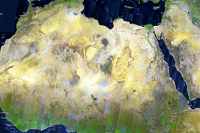

In [5]:
landsat_8_views

## What does the layer look like?

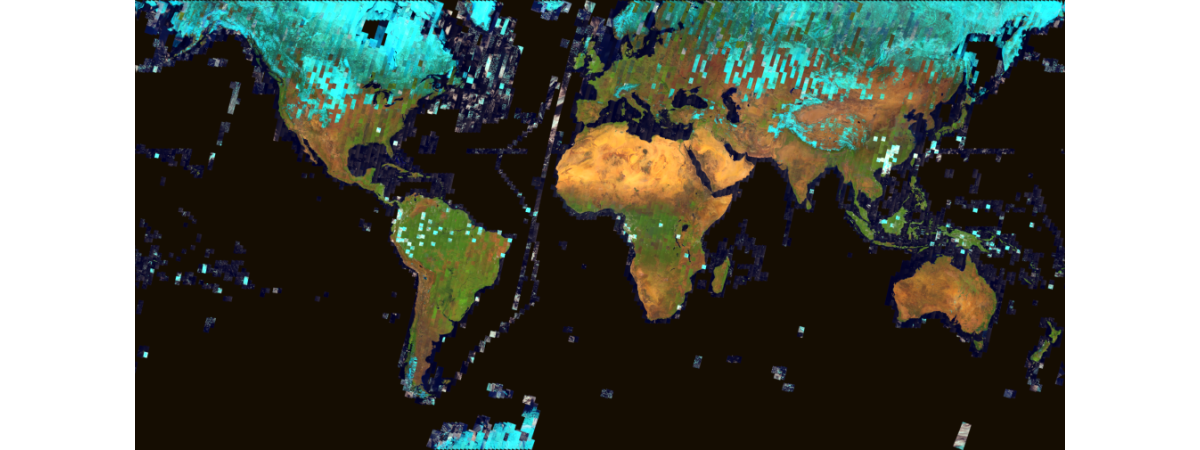

In [6]:
l8_lyr = landsat_8_views.layers[0]
l8_lyr

## What's the layer URL?

In [7]:
from arcgis.raster import ImageryLayer

In [8]:
l8_lyr.url

'https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer'

In [9]:
landsat_lyr = ImageryLayer("https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_PanSharpened/ImageServer",
                           gis=gis)

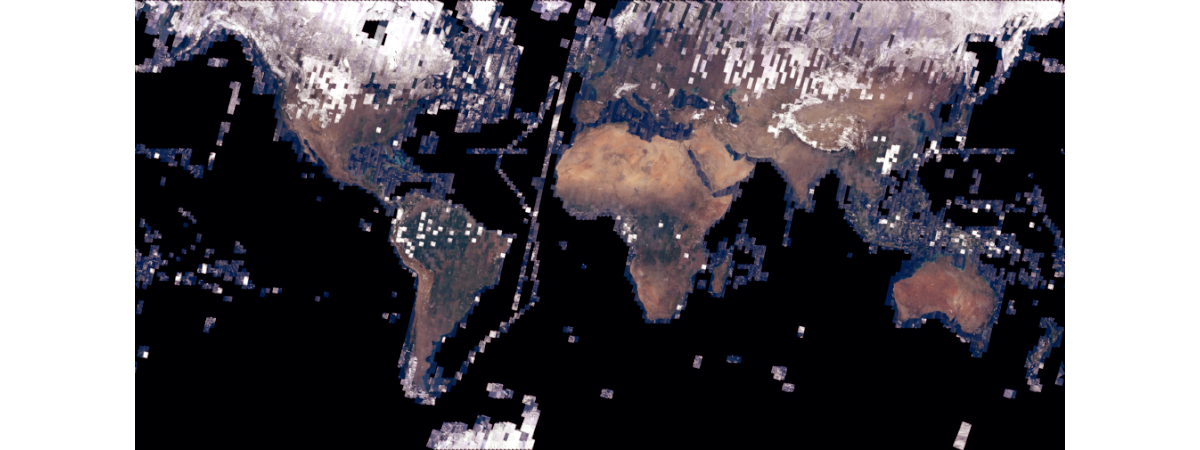

In [10]:
landsat_lyr

In [11]:
landsat_lyr = l8_lyr

## Let's look at some properties
### Name

In [12]:
landsat_lyr.properties.name

'Landsat8_Views'

### Description

In [13]:
landsat_lyr.properties['description']

'Multispectral Landsat 8 OLI Image Service covering the landmass of the World. This service includes 8-band multispectral scenes, at 30 meter resolution. It can be used for mapping and change detection of agriculture, soils, vegetation health, water-land features and boundary studies. Using on-the-fly processing, the raw DN values are transformed to scaled (0 - 10000) apparent reflectance values and then different service based renderings for band combinations and indices are applied. The service is updated on a daily basis to include the latest best scenes from the USGS.'

### Raster Functions

In [14]:
for fn in landsat_lyr.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


In [15]:
map1 = gis.map("Honolulu, Hawaii")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [16]:
map1.add_layer(landsat_lyr)

## Let's loop through the processing functions

In [17]:
import time
from arcgis.raster.functions import apply

for fn in landsat_lyr.properties.rasterFunctionInfos:
    print(fn['name'])
    map1.remove_layers()
    map1.add_layer(apply(landsat_lyr, fn['name']))
    time.sleep(3)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


## SAVI Map

```SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)```

In [26]:
savi_map = gis.map('Sacramento, CA')
savi_map

MapView(layout=Layout(height='400px', width='100%'))

In [29]:
ndvi_map = gis.map('Sacramento, CA')
ndvi_map

MapView(layout=Layout(height='400px', width='100%'))

In [31]:
ndvi_map.add_layer(ndvi(landsat_lyr, band_indexes="4 3"))

In [27]:
from arcgis.raster.functions import savi

savi_map.add_layer(savi(landsat_lyr, band_indexes="5 4 0.3"))

In [32]:
from arcgis.raster.functions import ndvi

In [33]:
s_map = savi(landsat_lyr, band_indexes="5 4 0.3")

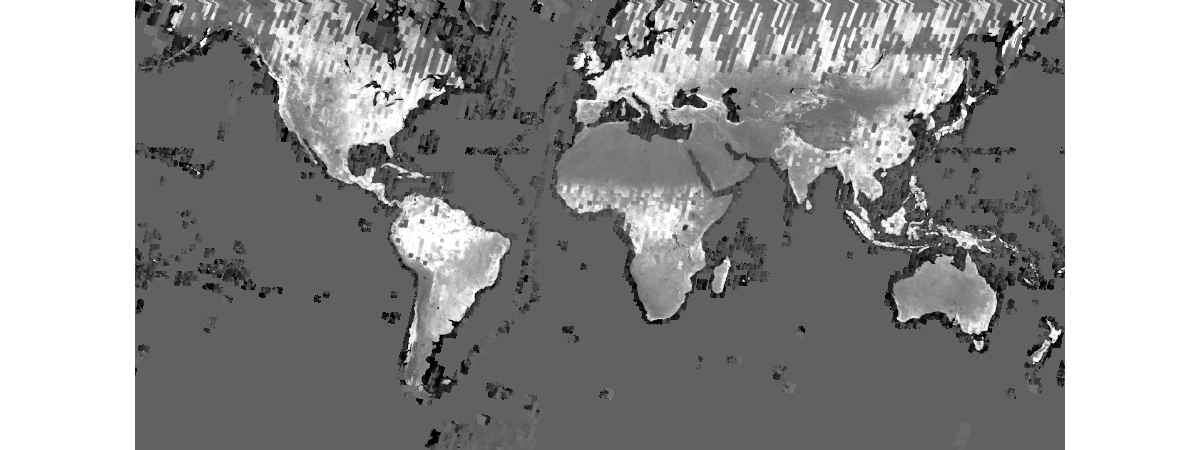

In [34]:
s_map.export_image(bbox=)

## You can apply this same concept using ndvi. I'll leave you to figure that out!